In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [63]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 5543 images belonging to 7 classes.
Found 1411 images belonging to 7 classes.


In [64]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

In [65]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [66]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 126s 714ms/step - accuracy: 0.3586 - loss: 1.5967 - val_accuracy: 0.7038 - val_loss: 0.7256
Epoch 2/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - accuracy: 0.6875 - loss: 0.8791 - val_accuracy: 1.0000 - val_loss: 0.1661
Epoch 3/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 125s 713ms/step - accuracy: 0.7081 - loss: 0.7941 - val_accuracy: 0.9368 - val_loss: 0.2234
Epoch 4/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 273us/step - accuracy: 0.9062 - loss: 0.3636 - val_accuracy: 1.0000 - val_loss: 0.3258
Epoch 5/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 122s 697ms/step - accuracy: 0.8112 - loss: 0.5139 - val_accuracy: 0.9744 - val_loss: 0.1020
Epoch 6/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 356us/step - accuracy: 0.7500 - loss: 0.7610 - val_accuracy: 1.0000 - val_loss: 1.1678e-04
Epoch 7/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 128s 731ms/step - accuracy: 0.8447 - loss: 0.4074 - val_accuracy: 0.9673 - val_loss: 0.0920
Epoch 8/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step - accuracy: 0.9375 - los

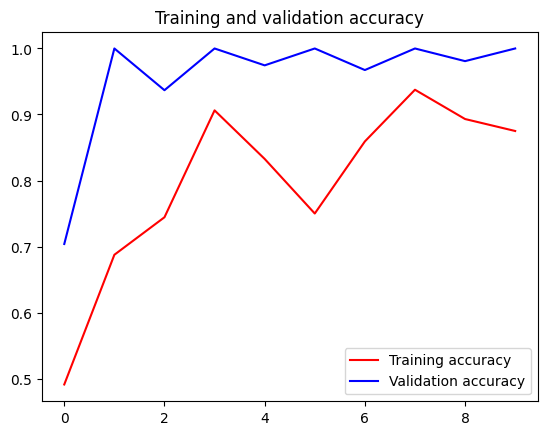

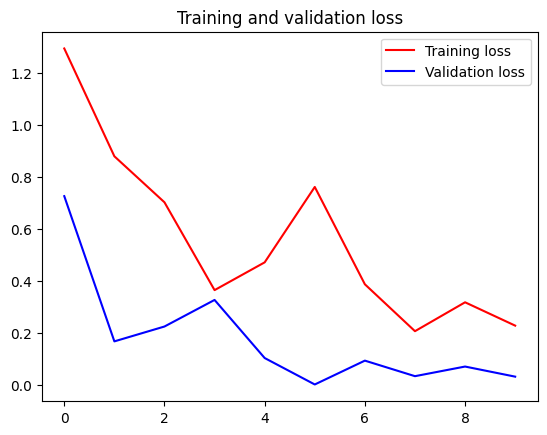

In [93]:
model.save('doodle_model.h5')

# Eğitim ve doğrulama kayıplarını ve doğruluklarını grafikle gösterme
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()